In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [27]:
x = df.drop(columns = ['output'],axis = 1)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns = ['output'],axis = 1),df['output'],test_size = 0.2,random_state = 101)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [10]:
dt = DecisionTreeClassifier(criterion = 'entropy',min_samples_leaf = 20)
dt_model = dt.fit(X_train,Y_train)

[Text(418.5, 489.24, 'X[2] <= 0.5\nentropy = 0.99\nsamples = 242\nvalue = [107, 135]'),
 Text(209.25, 380.52000000000004, 'X[11] <= 0.5\nentropy = 0.853\nsamples = 115\nvalue = [83, 32]'),
 Text(104.625, 271.8, 'X[8] <= 0.5\nentropy = 1.0\nsamples = 53\nvalue = [26, 27]'),
 Text(52.3125, 163.08000000000004, 'entropy = 0.764\nsamples = 27\nvalue = [6, 21]'),
 Text(156.9375, 163.08000000000004, 'entropy = 0.779\nsamples = 26\nvalue = [20, 6]'),
 Text(313.875, 271.8, 'X[3] <= 131.0\nentropy = 0.404\nsamples = 62\nvalue = [57, 5]'),
 Text(261.5625, 163.08000000000004, 'entropy = 0.592\nsamples = 35\nvalue = [30, 5]'),
 Text(366.1875, 163.08000000000004, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(627.75, 380.52000000000004, 'X[0] <= 56.5\nentropy = 0.699\nsamples = 127\nvalue = [24, 103]'),
 Text(523.125, 271.8, 'X[4] <= 229.0\nentropy = 0.35\nsamples = 76\nvalue = [5, 71]'),
 Text(470.8125, 163.08000000000004, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(575.4375, 163

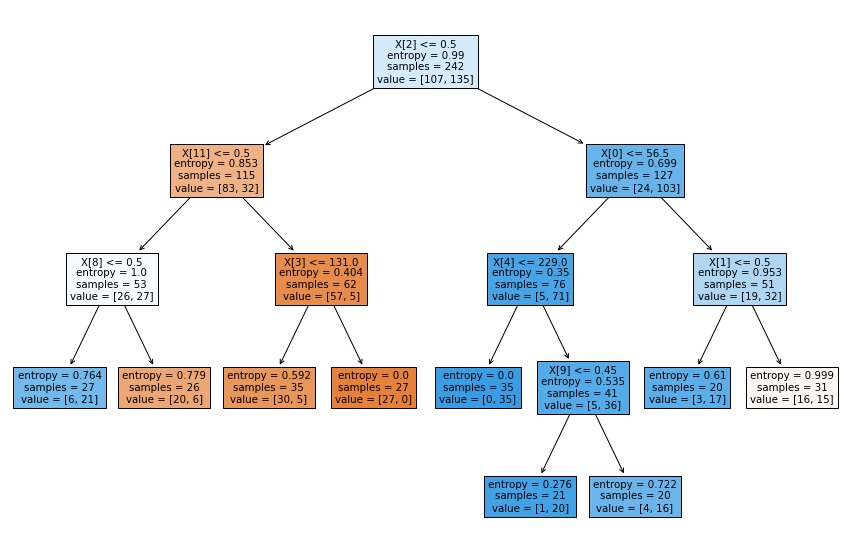

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,10))
tree.plot_tree(dt,filled = True)

In [12]:
Y_pred = dt_model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [14]:
confusion_matrix(Y_test,Y_pred)

array([[24,  7],
       [ 5, 25]], dtype=int64)

In [15]:
accuracy = ((Y_pred==Y_test).sum())/len(Y_test)

In [16]:
accuracy

0.8032786885245902

In [17]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(Y_test,Y_pred, pos_label = 1,average = 'binary')
print("precision : {} / Recall : {}".format(precision,recall))


precision : 0.78125 / Recall : 0.8333333333333334


In [18]:
from sklearn.model_selection import KFold, cross_val_score

In [19]:

k_fold = KFold(n_splits = 5)
cross_val_score(dt,df.drop(columns = ['output'],axis = 1) , df['output'], cv = k_fold, scoring='accuracy' )

array([0.75409836, 0.70491803, 0.72131148, 0.71666667, 0.7       ])

In [20]:
k_fold = KFold(n_splits = 5)
cross_val_score(dt,df.drop(columns = ['output'],axis = 1) , df['output'], cv = k_fold, scoring='precision')

array([1.        , 1.        , 0.84210526, 0.        , 0.        ])

In [21]:
print(dir(DecisionTreeClassifier))
print(DecisionTreeClassifier())
dt.get_depth()

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_prune_tree', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_X_predict', '_validate_data', 'apply', 'cost_complexity_pruning_path', 'decision_path', 'feature_importances_', 'fit', 'get_depth', 'get_n_leaves', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
DecisionTreeClassifier()


4

In [22]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [23]:
dt.feature_importances_

array([0.11889716, 0.04718698, 0.46005087, 0.03809521, 0.0407196 ,
       0.        , 0.        , 0.        , 0.10545815, 0.01477686,
       0.        , 0.17481518, 0.        ])

In [24]:
print(dir(metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_los

In [25]:
df1 = pd.DataFrame(Y_pred,Y_test)

In [26]:
df1.head(10)

,0
output,
0,0
1,1
1,1
1,1
0,0
1,1
1,1
0,0
0,0
